# NetworkX starter

This notebook contains examples of creating and analyzing network graphs with the NetworkX package. The NetworkX package is typically imported as nx.

There are 4 types of network graphs. 

1. **Undirected Graph** has only undirected edges. Create with nx.Graph()
2. **Directed Graph** has at least one directed edge. Create with nx.DiGraph()
3. **MultiGraph** is an undirected graph with multiple edges between the same nodes. Create with nx.MultiGraph()
4. **Directed MultiGraph** is a directed graph with parallel edges. Create with nx.MultiDiGraph()


In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

## Build the network

A network can be built by adding nodes and edges, one or several at a time. NetworkX can also take a list of tuples or a dictionary to create the graph. 

In [2]:
# start with two nodes that are connected
G = nx.Graph([('Amy', 'Katie')],) 
G.add_node('Will')
G.add_node('Patrick')
# add a list of nodes
G.add_nodes_from(['Yuwen', 'Grettel'])  

# add the edges
G.add_edge('Amy', 'Will')
G.add_edge('Katie', 'Will')
# can add a list of edges
G.add_edges_from([('Amy', 'Aaron'), ('Katie', 'Aaron'), ('Will', 'Aaron'),('Patrick','Grettel'), 
                  ('Amy','Grettel'), ('Amy', 'Yuwen'), ('Patrick', 'Yuwen'), ('Amy','Patrick')])


In [3]:
# print the network nodes
print(repr(G.nodes))

NodeView(('Amy', 'Katie', 'Will', 'Patrick', 'Yuwen', 'Grettel', 'Aaron'))


In [4]:
# print the network edge pairs
print(repr(G.edges))

EdgeView([('Amy', 'Katie'), ('Amy', 'Will'), ('Amy', 'Aaron'), ('Amy', 'Grettel'), ('Amy', 'Yuwen'), ('Amy', 'Patrick'), ('Katie', 'Will'), ('Katie', 'Aaron'), ('Will', 'Aaron'), ('Patrick', 'Grettel'), ('Patrick', 'Yuwen')])


In [5]:
# a python list of tuples can be passed to NetworkX graph functions
ab_list = [('Amy', 'Katie'), ('Amy', 'Will'), ('Amy', 'Aaron'), ('Amy', 'Grettel'), 
           ('Amy', 'Yuwen'), ('Amy', 'Patrick'), ('Katie', 'Will'), ('Katie', 'Aaron'), 
           ('Will', 'Aaron'), ('Patrick', 'Grettel'), ('Patrick', 'Yuwen')]
G2 = nx.Graph(ab_list)
G2

## Import the network data from a file

Can read the network data from a file that has each row as an edge instance. Note how here the raw CSV is read and not changed to a pandas dataframe.  

In [6]:
import csv

with open('ab_project_teams.csv') as infile:
    csv_reader = csv.reader(infile)
    G3= nx.Graph(csv_reader)
    
    
# The CSV contents look like this:

"""
Amy,Katie
Amy,Will
Amy,Aaron
Katie,Will
Katie,Aaron
Will,Aaron
Amy,Grettel
Amy,Patrick
Patrick,Grettel
Patrick,Yuwen
Amy,Yuwen
"""

print(G3.nodes())

['Amy', 'Katie', 'Will', 'Aaron', 'Grettel', 'Patrick', 'Yuwen']


A Pandas dataframe is a possible input into NetworkX. Here, the CSV file is read into a Pandas dataframe. Each row having an edge instance is called an edgelist. NetworkX has a specific function to read this edgelist. Additional arguments can be added to specify the network graph type to create. 

In [7]:
edges = pd.read_csv('ab_teams_edges.csv')
edges.head()


,node_1,node_2
0,Amy,Katie
1,Amy,Will
2,Amy,Aaron
3,Katie,Will
4,Katie,Aaron


In [8]:
F = nx.from_pandas_edgelist(edges, source="node_1", target="node_2")
F


In [9]:
F.nodes()

NodeView(('Amy', 'Katie', 'Will', 'Aaron', 'Grettel', 'Patrick', 'Yuwen'))

In [10]:
F.edges()

EdgeView([('Amy', 'Katie'), ('Amy', 'Will'), ('Amy', 'Aaron'), ('Amy', 'Grettel'), ('Amy', 'Patrick'), ('Amy', 'Yuwen'), ('Katie', 'Will'), ('Katie', 'Aaron'), ('Will', 'Aaron'), ('Grettel', 'Patrick'), ('Patrick', 'Yuwen')])

## Visualize the network

There are a variety of layout algorithms to display the network.  Sometimes the nodes overlap and it can be difficult to see the connections. Here are a few layout options for our small network example. The spring layout usually works best at preventing node overlap. The circular layout made it easy to see who is and is not connected. 

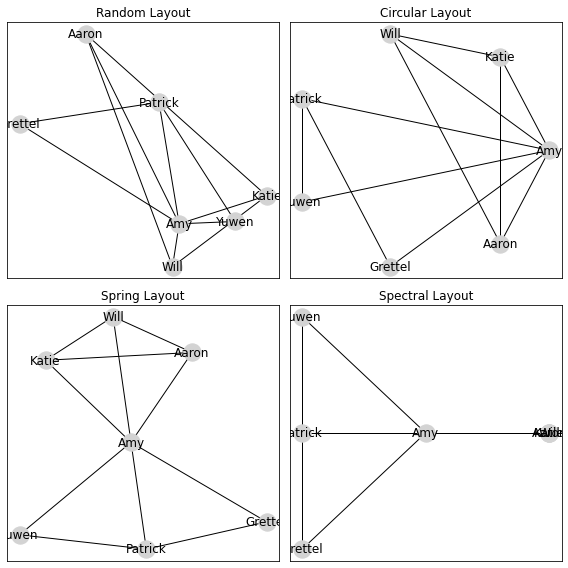

In [11]:
plt.rcParams["figure.figsize"] = (8,8)
#plt.subplots_adjust(left=5, bottom=5, right=6, top=6, wspace=0, hspace=0)
#
_, plot = plt.subplots(2,2)
subplots = plot.reshape(1,4)[0]


layouts = (nx.random_layout, nx.circular_layout, nx.spring_layout, nx.spectral_layout)
titles = ("Random Layout", "Circular Layout", "Spring Layout", "Spectral Layout")
for plot, layout, title in zip(subplots, layouts, titles):
    pos = layout(G)
    nx.draw_networkx(G, pos=pos, ax=plot, with_labels=True, node_color='LightGray')
    plot.set_title(title)
    plt.tight_layout()
plt.savefig('layout_types.svg')

There are multiple options to export and import NetworkX graphs. Pickle is one option. The GraphML file option is recommended as the best for between NetworkX and Gephi. Gephi is a separate open source graph viz tool. Available at https://gephi.org along with instructions. 

In [12]:
# multiple options to export and import any NetworkX network
# the GraphML file option is recommended as the best for between NetworkX and Gephi

nx.write_graphml(G, 'ab_teams.graphml')


In [14]:
# OR code like this will also export to GraphML file

with open('ab_teams.graphml', 'wb') as out_file:
    nx.write_graphml(G, out_file)

## Analyze the network

Here are several different metrics that describe the network

### Network Size

In [18]:
# The size of a network is either it’s node count or edge count, or both!

# COUNT NODES
len(G)
#OR
len(G.nodes())
#OR
nodes = nx.number_of_nodes(G)


# COUNT EDGES
len(G.edges())
#OR
edges = nx.number_of_edges(G)

print(f"This network has {nodes} nodes and {edges} edges.")

This network has 7 nodes and 11 edges.


### Centrality Measures

Centrality indicates which node(s) has the most effect on the others. There are many centrality measures. Here are the most common:

1. **Degree Centrality** Important nodes have many connections
2. **Betweenness Centrality** Important nodes connect other nodes
3. **Closeness Centrality** Important nodes are close to other nodes
4. **Eigenvector Centrality** Important nodes have many connections to other important nodes
5. **Page Rank** Important nodes have many in-coming edges. A variant of the Eigenvector Centrality that is used to anlayze directed networks. 



In [9]:
# degree
dgr = nx.degree_centrality(G)
dgr
# returns a dictionary of each node and the node's degree centrality 

{'Amy': 1.0,
 'Katie': 0.5,
 'Will': 0.5,
 'Patrick': 0.5,
 'Yuwen': 0.3333333333333333,
 'Grettel': 0.3333333333333333,
 'Aaron': 0.5}

In [10]:
# betweenness
btw = nx.betweenness_centrality(G)
btw

{'Amy': 0.6333333333333333,
 'Katie': 0.0,
 'Will': 0.0,
 'Patrick': 0.03333333333333333,
 'Yuwen': 0.0,
 'Grettel': 0.0,
 'Aaron': 0.0}

In [12]:
# closeness
clo = nx.closeness_centrality(G)
clo

{'Amy': 1.0,
 'Katie': 0.6666666666666666,
 'Will': 0.6666666666666666,
 'Patrick': 0.6666666666666666,
 'Yuwen': 0.6,
 'Grettel': 0.6,
 'Aaron': 0.6666666666666666}

In [13]:
# eigenvector
eig = nx.eigenvector_centrality(G)
eig

{'Amy': 0.5701255210211554,
 'Katie': 0.38733041070266955,
 'Will': 0.38733041070266955,
 'Patrick': 0.3102849314001847,
 'Yuwen': 0.25357997797641946,
 'Grettel': 0.25357997797641946,
 'Aaron': 0.38733041070266955}

In [14]:
# page rank
pgr = nx.pagerank(G)
pgr

{'Amy': 0.25917717362138704,
 'Katie': 0.1341816504650471,
 'Will': 0.1341816504650471,
 'Patrick': 0.14169311129996892,
 'Yuwen': 0.09829238184175122,
 'Grettel': 0.09829238184175122,
 'Aaron': 0.1341816504650471}

### Neighborhoods

In a large network that can't be visualized easily, you may wish to find who a node of interest is connected to. In other words, the node's neighbors.

In [15]:
katie_neighbors = list(nx.all_neighbors(G, 'Katie'))
katie_neighbors

['Amy', 'Will', 'Aaron']

### Graph Density

Graph density measures the fraction of existing edges out of all potentially possible edges. Denstiy is a number between 0 and 1, inclusive. Density of 0 means no edges. Density of 1 is a complete graph. 


In [16]:
nx.density(G)

0.5238095238095238

### Eccentricity

Eccentricity is the maximum distance from a node to all other nodes in the network.

In [17]:
ecc = nx.eccentricity(G)

print(ecc)


{'Amy': 1, 'Katie': 2, 'Will': 2, 'Patrick': 2, 'Yuwen': 2, 'Grettel': 2, 'Aaron': 2}


In [18]:
# specific node
print(ecc['Will']) 

2


### Average Path Length

An average number of steps along the shortest paths for all possible pairs of network nodes.  This is a metric to understand connectivity in a network.  It can indicate the speed of information propagation in the network. 

In [19]:
nx.average_shortest_path_length(G)

1.4761904761904763